In [1]:
#Importing requried libraries
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

#Visalization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Alogirthms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

#Pre-processing libraires
from sklearn.metrics import accuracy_score, recall_score,precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold

#Warnings 
import warnings
warnings.filterwarnings('ignore')

#Hyperparamter tunning 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [3]:
df = pd.read_excel('data.xlsx')

In [4]:
df.head() # top 5 records

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [5]:
df.shape #shape of the data

(129880, 24)

### Step 2 : Data Cleaning and Preparation

In [6]:
df.info() #summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   satisfaction_v2                    129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [7]:
dup = df.duplicated() #Checking duplicates values
print('Duplicate values :',dup.sum())

Duplicate values : 0


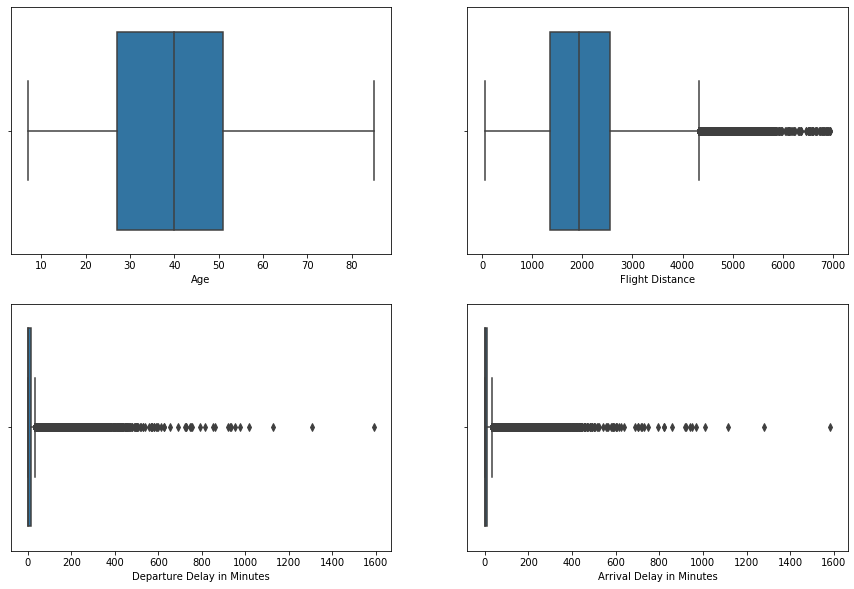

In [8]:
# Checking for the outliers
fig, ax = plt.subplots(nrows = 2 ,ncols = 2,figsize = (15,10))
sns.boxplot(df['Age'], ax = ax[0,0])
sns.boxplot(df['Flight Distance'], ax = ax[0,1])
sns.boxplot(df['Departure Delay in Minutes'],  ax = ax[1,0])
sns.boxplot(df['Arrival Delay in Minutes'] , ax = ax[1,1])
plt.show()

### Inference:
* The Maximum age limit by the Age lines is 60 
* Flight distance is depends up on Airlines
* Due to techincal issues, weather conitions, Airport Authorities filght may delay for departure maximum time considering is 4 hr  
* Arrival delay can be max 4 hr for international flights and for domestic flights 3 hr   

In [9]:
df = df[(df['Age']<=60)&(df['Departure Delay in Minutes']<=240)&(df['Arrival Delay in Minutes']<=240)&(df['Flight Distance']<=5000)]#cleaing outliers

In [10]:
df.shape #After removing outliers

(117981, 24)

In [11]:
df.isnull().sum() # Checking NULL values

id                                   0
satisfaction_v2                      0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [12]:
print('Total No.of Null Values :',df.isnull().sum().sum()) #Checking Null values

Total No.of Null Values : 0


In [13]:
cols = [ 'Seat comfort','Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',]

for i in cols:
    print(i,':',df[i].unique()) # Checking the values

Seat comfort : [0 1 4 5 2 3]
Departure/Arrival time convenient : [0 1 2 3 4 5]
Food and drink : [0 1 2 3 4 5]
Gate location : [3 4 1 2 5 0]
Inflight wifi service : [2 3 5 4 1 0]
Inflight entertainment : [0 4 3 2 1 5]
Online support : [2 3 5 4 1 0]
Ease of Online booking : [2 1 4 3 5 0]
On-board service : [3 1 5 4 2 0]
Leg room service : [3 0 4 2 5 1]
Baggage handling : [4 1 5 2 3]
Checkin service : [4 5 3 2 1 0]
Cleanliness : [4 1 3 5 2 0]
Online boarding : [2 3 4 5 1 0]


In [14]:
#Reseting the index
df.reset_index(drop= True,inplace=True) 
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
1,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
2,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
3,32864,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
4,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0


### Step 3: Visualizing the data

In [15]:
categorical = df.select_dtypes(include = 'object').columns # Categorical values
for i in categorical:
    print(i)

satisfaction_v2
Gender
Customer Type
Type of Travel
Class


### Univariate Analysis

#### satisfaction

In [16]:
df.satisfaction_v2.value_counts()/len(df) #Checking whether data is Balance or imbalance 

satisfied                  0.556751
neutral or dissatisfied    0.443249
Name: satisfaction_v2, dtype: float64

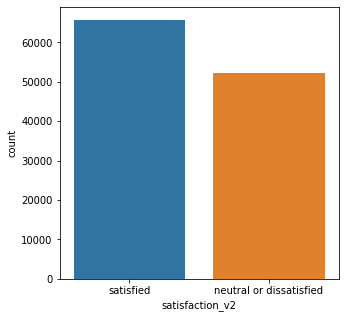

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'satisfaction_v2', data = df)
plt.show()

### Inference:
* Checking whether data is Balance or imbalance
* The data is balanced and it is in ratio of 54:45

#### Gender, Customer Type, Type of Travel, Class

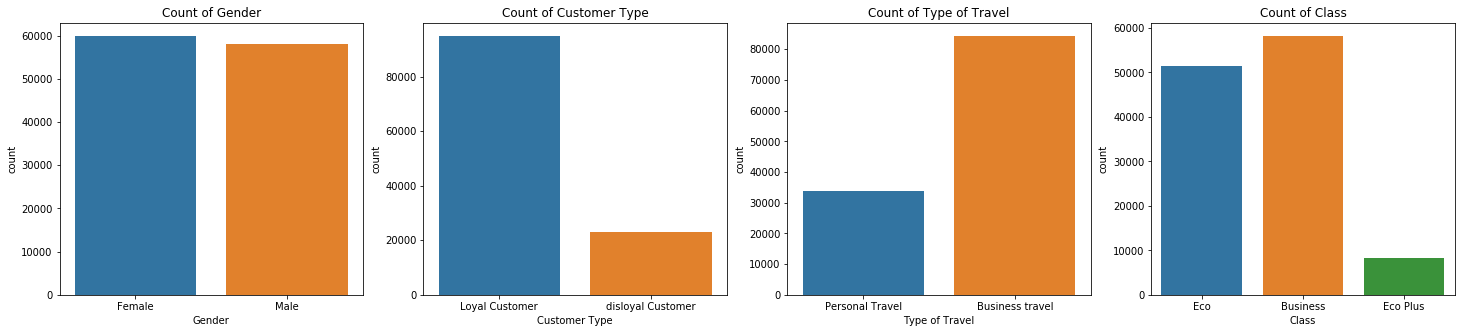

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'Gender', data = df, ax = ax[0]).set(title = 'Count of Gender')
sns.countplot(x = 'Customer Type', data = df, ax = ax[1]).set(title = 'Count of Customer Type')
sns.countplot(x = 'Type of Travel', data = df, ax = ax[2]).set(title = 'Count of Type of Travel')
sns.countplot(x = 'Class', data = df, ax = ax[3]).set(title = 'Count of Class')
plt.show()

### Inference:
* Both Male and Female customers are equal
* Most of the customers are loyal customers 
* Most of the travel type cusomter are Business Travel
* In class Economy and business are bit equal and eco plus customers are very less

In [19]:
numeric = df.select_dtypes(include = np.number).columns
for i in numeric:
    print(i)

id
Age
Flight Distance
Seat comfort
Departure/Arrival time convenient
Food and drink
Gate location
Inflight wifi service
Inflight entertainment
Online support
Ease of Online booking
On-board service
Leg room service
Baggage handling
Checkin service
Cleanliness
Online boarding
Departure Delay in Minutes
Arrival Delay in Minutes


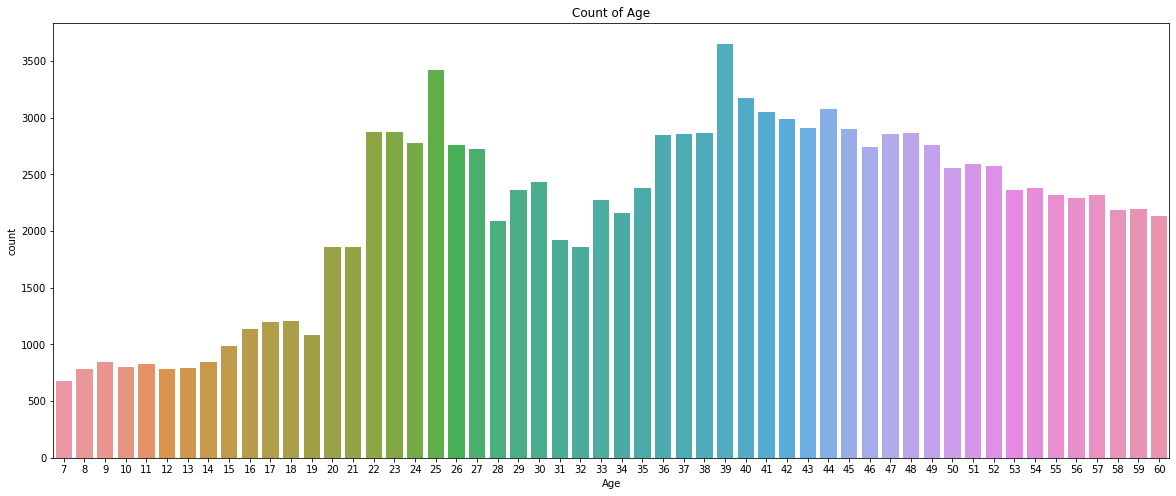

In [20]:
fig= plt.subplots(figsize = (20,8))
sns.countplot(x = 'Age', data = df).set(title = 'Count of Age')
plt.show()

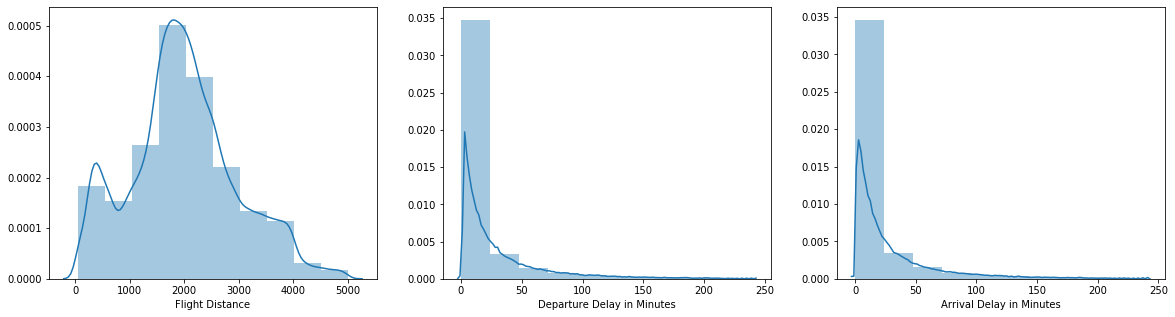

In [21]:
fig, ax = plt.subplots(nrows = 1 ,ncols = 3,figsize = (20,5))
sns.distplot(df['Flight Distance'], bins = 10, ax = ax[0])
sns.distplot(df['Departure Delay in Minutes'], bins = 10, ax = ax[1])
sns.distplot(df['Arrival Delay in Minutes'], bins = 10, ax = ax[2])
plt.show()

### Inference:
* Flight distance is normally distributed 
* Departure delay is highly right skewed and many of the flights are on time
* Arrival delay is highly right skewed and many of the flights are on time

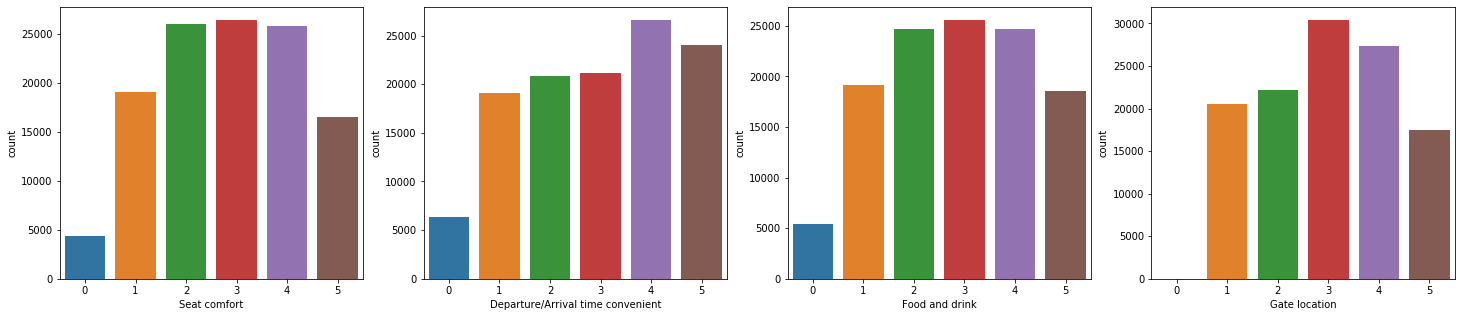

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'Seat comfort', data = df, ax = ax[0])
sns.countplot(x = 'Departure/Arrival time convenient', data = df, ax = ax[1])
sns.countplot(x = 'Food and drink', data = df, ax = ax[2])
sns.countplot(x = 'Gate location', data = df, ax = ax[3])
plt.show()

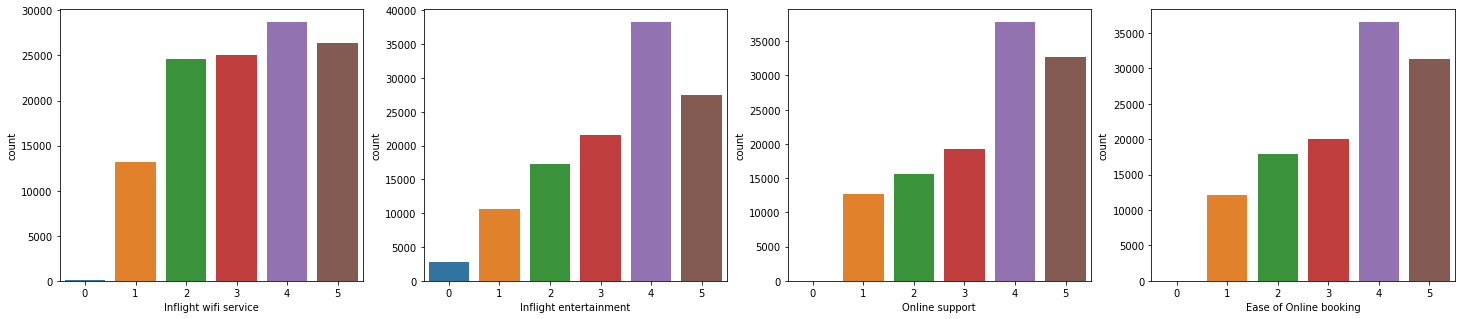

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'Inflight wifi service', data = df, ax = ax[0])
sns.countplot(x = 'Inflight entertainment', data = df, ax = ax[1])
sns.countplot(x = 'Online support', data = df, ax = ax[2])
sns.countplot(x = 'Ease of Online booking', data = df, ax = ax[3])
plt.show()

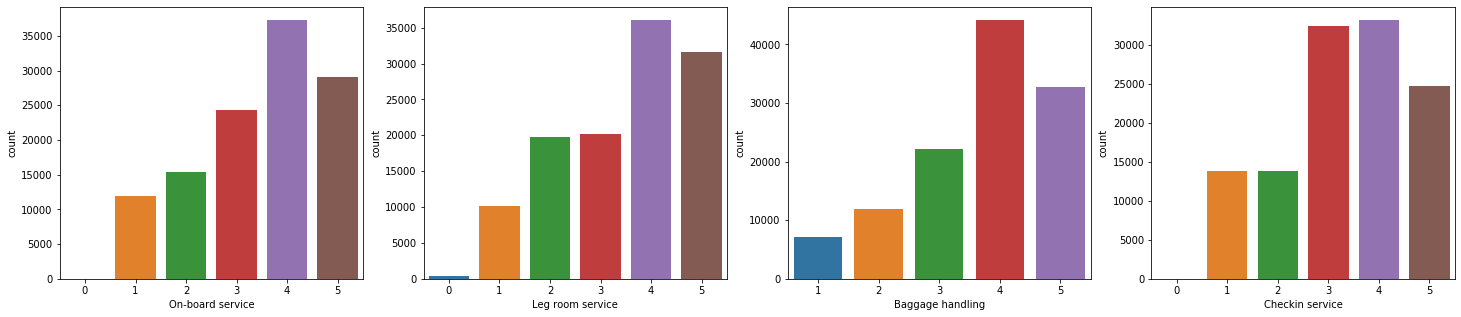

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'On-board service', data = df, ax = ax[0])
sns.countplot(x = 'Leg room service', data = df, ax = ax[1])
sns.countplot(x = 'Baggage handling', data = df, ax = ax[2])
sns.countplot(x = 'Checkin service', data = df, ax = ax[3])
plt.show()

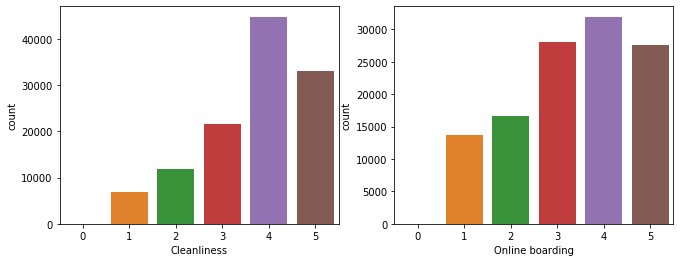

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (11,4))
sns.countplot(x = 'Cleanliness', data = df, ax = ax[0])
sns.countplot(x = 'Online boarding', data = df, ax = ax[1])
plt.show()

### Bivariate Analysis

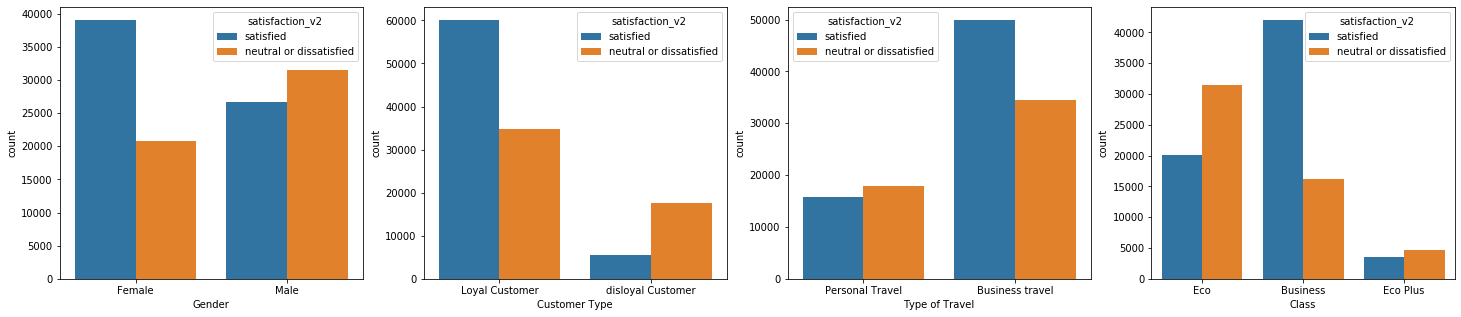

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'Gender',hue = 'satisfaction_v2', data = df, ax = ax[0])
sns.countplot(x = 'Customer Type',hue = 'satisfaction_v2', data = df, ax = ax[1])
sns.countplot(x = 'Type of Travel',hue = 'satisfaction_v2', data = df, ax = ax[2])
sns.countplot(x = 'Class',hue = 'satisfaction_v2', data = df, ax = ax[3])
plt.show()

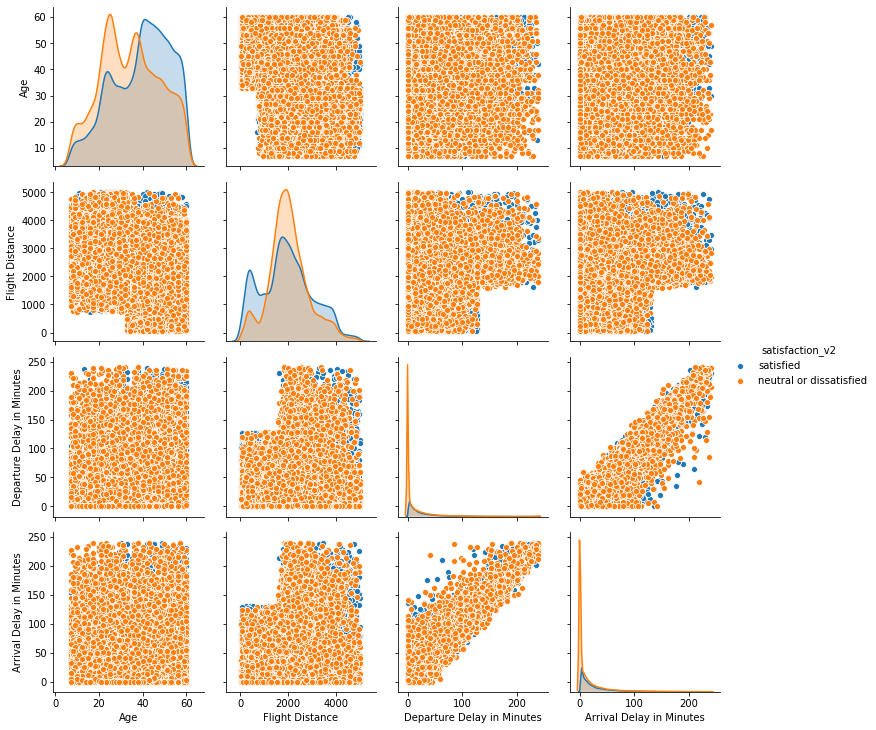

In [27]:
sns.pairplot(df,hue = 'satisfaction_v2',vars = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'])
plt.show()

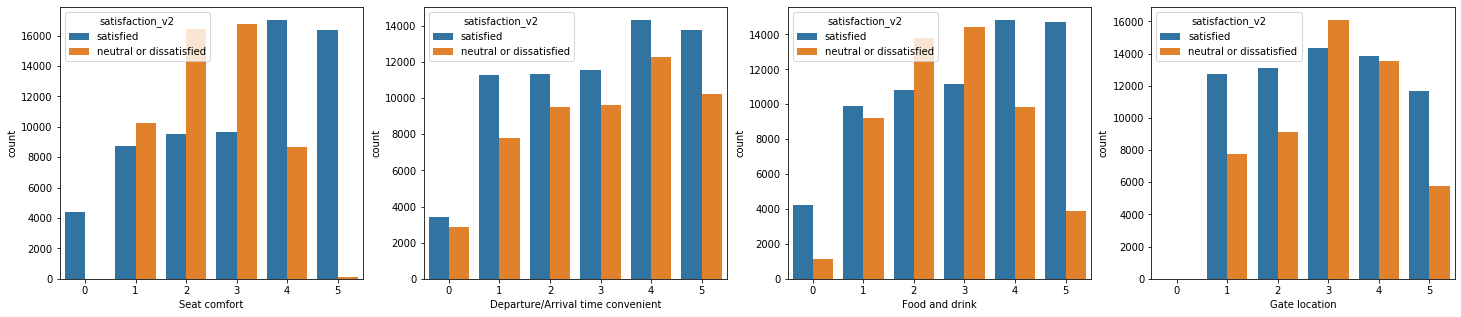

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'Seat comfort',hue = 'satisfaction_v2', data = df, ax = ax[0])
sns.countplot(x = 'Departure/Arrival time convenient',hue = 'satisfaction_v2', data = df, ax = ax[1])
sns.countplot(x = 'Food and drink',hue = 'satisfaction_v2', data = df, ax = ax[2])
sns.countplot(x = 'Gate location',hue = 'satisfaction_v2', data = df, ax = ax[3])
plt.show()

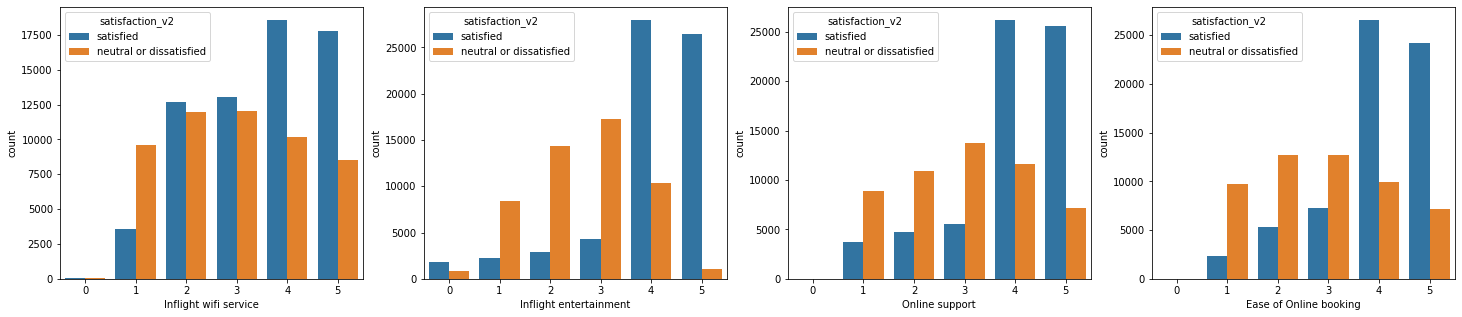

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'Inflight wifi service',hue = 'satisfaction_v2', data = df, ax = ax[0])
sns.countplot(x = 'Inflight entertainment',hue = 'satisfaction_v2', data = df, ax = ax[1])
sns.countplot(x = 'Online support',hue = 'satisfaction_v2', data = df, ax = ax[2])
sns.countplot(x = 'Ease of Online booking',hue = 'satisfaction_v2', data = df, ax = ax[3])
plt.show()

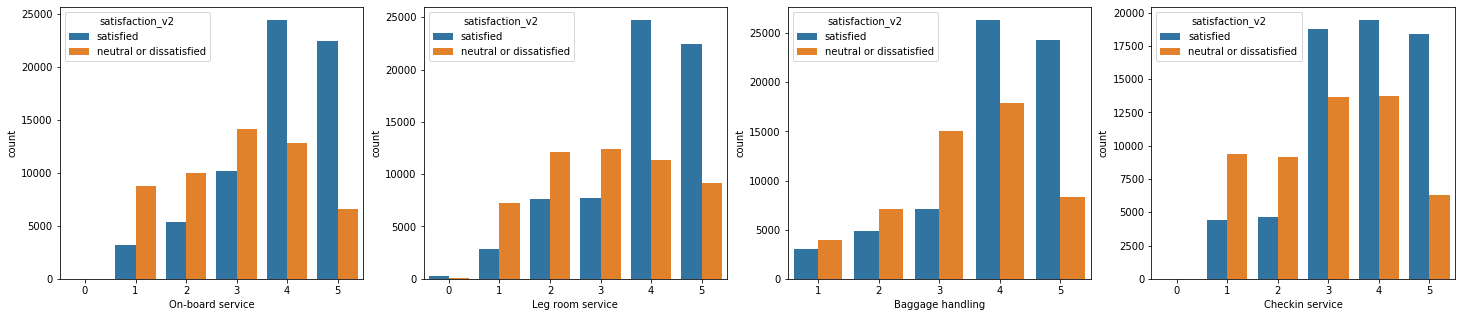

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25,5))
sns.countplot(x = 'On-board service',hue = 'satisfaction_v2', data = df, ax = ax[0])
sns.countplot(x = 'Leg room service',hue = 'satisfaction_v2', data = df, ax = ax[1])
sns.countplot(x = 'Baggage handling',hue = 'satisfaction_v2', data = df, ax = ax[2])
sns.countplot(x = 'Checkin service',hue = 'satisfaction_v2', data = df, ax = ax[3])
plt.show()

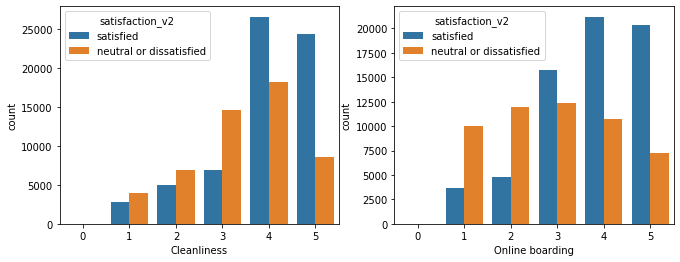

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (11,4))
sns.countplot(x = 'Cleanliness',hue = 'satisfaction_v2', data = df, ax = ax[0])
sns.countplot(x = 'Online boarding',hue = 'satisfaction_v2', data = df, ax = ax[1])
plt.show()

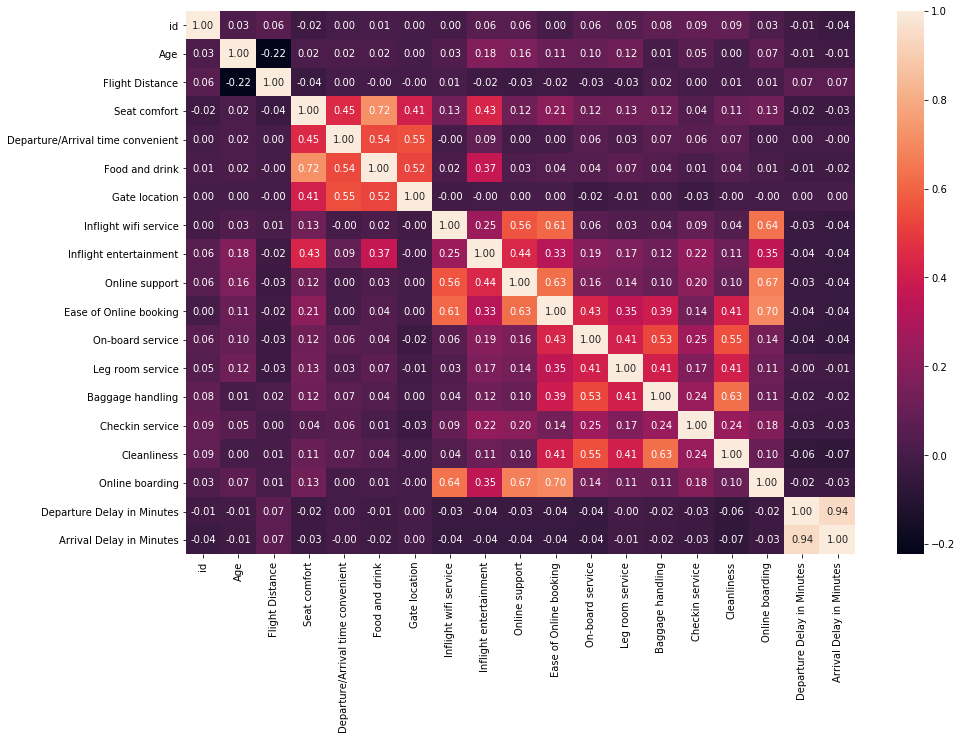

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True, fmt='.2f')
plt.show()

### New Feaures

In [33]:
df2 = df.copy()

In [34]:
# df2['age_bin'] = pd.cut(df2['Age'], bins=[0,10,20,30,40,50,60], labels=['Child','teenage','Young','Adult','Adult+','Old'])

In [35]:
df2.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
1,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
2,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0
3,32864,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0
4,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0


In [36]:
# df2['age_bin'] = df2['age_bin'].astype('object')

In [37]:
df3 = pd.get_dummies(df2, drop_first=True)

In [38]:
df3.head()

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_v2_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,103199,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,0,1,1,0
1,47462,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,0,1,1,0
2,100744,30,1894,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0,0.0,1,1,0,1,1,0
3,32864,10,1812,0,0,0,3,2,0,2,2,3,3,4,5,4,2,0,0.0,1,1,0,1,1,0
4,53786,56,73,0,0,0,3,5,3,5,4,4,0,1,5,4,4,0,0.0,1,0,0,1,0,0


In [39]:
X = df3.drop(['id','satisfaction_v2_satisfied'], axis = 1)
y = df3['satisfaction_v2_satisfied']

In [40]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 101)

In [41]:
print(X_train.shape)
print(y_test.shape)
df.shape

(82586, 23)
(35395,)


(117981, 24)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [43]:
checkVIF(X)

,Features,VIF
9,Ease of Online booking,31.64
14,Cleanliness,22.94
12,Baggage handling,21.51
15,Online boarding,21.33
8,Online support,19.48
10,On-board service,15.17
6,Inflight wifi service,14.29
7,Inflight entertainment,14.07
4,Food and drink,13.70
2,Seat comfort,12.89


## Logistic regession without scaling

Accuracy : 0.752246143414138
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.74      0.67      0.71     36577
           1       0.76      0.81      0.79     46009

    accuracy                           0.75     82586
   macro avg       0.75      0.74      0.75     82586
weighted avg       0.75      0.75      0.75     82586


Accuracy : 0.7518011018505438
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.74      0.68      0.71     15718
           1       0.76      0.81      0.78     19677

    accuracy                           0.75     35395
   macro avg       0.75      0.74      0.75     35395
weighted avg       0.75      0.75      0.75     35395



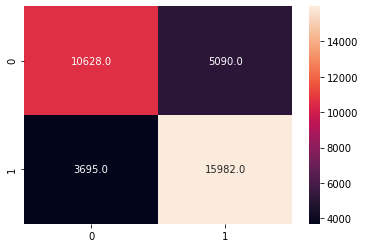

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [46]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 77.234


## Logistic regession with scaling



In [47]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)

Accuracy : 0.839016298161916
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     36577
           1       0.85      0.86      0.86     46009

    accuracy                           0.84     82586
   macro avg       0.84      0.84      0.84     82586
weighted avg       0.84      0.84      0.84     82586


Accuracy : 0.8403446814521826
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     15718
           1       0.87      0.84      0.85     19677

    accuracy                           0.84     35395
   macro avg       0.84      0.84      0.84     35395
weighted avg       0.84      0.84      0.84     35395



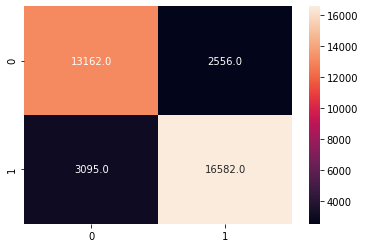

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [51]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(logreg, X_scaled, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 83.928


## Logisticregression using Hyperparamter tunning

In [52]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Create the random grid
random_grid = {'solver':solvers,
               'penalty':penalty,
               'C':c_values}

print(random_grid)

classification = LogisticRegression()

log = RandomizedSearchCV(estimator = classification, param_distributions = random_grid,scoring='accuracy', n_iter =20, cv = 5, verbose=5, random_state=42, n_jobs = -1)

log.fit(X_train_scaled,y_train)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=42, scoring='accuracy', verbose=5)

In [53]:
log.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}

Accuracy : 0.8390284067517497
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     36577
           1       0.85      0.86      0.86     46009

    accuracy                           0.84     82586
   macro avg       0.84      0.84      0.84     82586
weighted avg       0.84      0.84      0.84     82586


Accuracy : 0.8402316711399915
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     15718
           1       0.87      0.84      0.85     19677

    accuracy                           0.84     35395
   macro avg       0.84      0.84      0.84     35395
weighted avg       0.84      0.84      0.84     35395



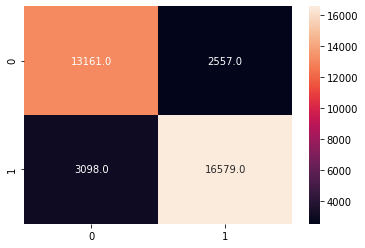

In [54]:
logreg = LogisticRegression(solver='newton-cg',C = 10,penalty = 'l2')
logreg.fit(X_train_scaled, y_train)
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [55]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(logreg, X_scaled, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 83.929


##  Descion Tree Classifier

Accuracy : 1.0
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36577
           1       1.00      1.00      1.00     46009

    accuracy                           1.00     82586
   macro avg       1.00      1.00      1.00     82586
weighted avg       1.00      1.00      1.00     82586


Accuracy : 0.9332391580731741
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     15718
           1       0.94      0.94      0.94     19677

    accuracy                           0.93     35395
   macro avg       0.93      0.93      0.93     35395
weighted avg       0.93      0.93      0.93     35395



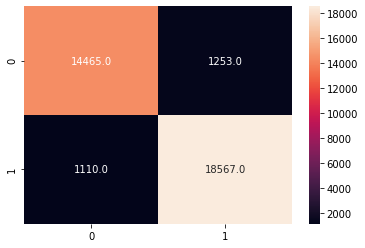

In [56]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [57]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(dt, X_scaled, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 93.750


##  Descion Tree Classifier with hyper parameter tunning

In [58]:
max_depths = [int(x) for x in np.linspace(1, 32, num = 32)]
min_samples_leafs = [int(x) for x in np.linspace(1, 5, num = 5)]
min_samples_splits = [int(x) for x in np.linspace(1, 10, num = 10)]
criterions = ['gini', 'entropy']
splitters =  ['best','random']
max_features = ['auto','sqrt','log2']
# Create the random grid
random_grid = {
             'criterion':criterions,
               'splitter':splitters,
            'max_depth':max_depths,
              'min_samples_leaf':min_samples_leafs,
              'min_samples_split':min_samples_splits,
                 'max_features': max_features
 }

print(random_grid)

classification = DecisionTreeClassifier()

dt = RandomizedSearchCV(estimator = classification, param_distributions = random_grid,scoring='accuracy', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

dt.fit(X_train,y_train)
dt.best_params_

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 18,
 'criterion': 'gini'}

Accuracy : 0.9486837962850846
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     36577
           1       0.96      0.95      0.95     46009

    accuracy                           0.95     82586
   macro avg       0.95      0.95      0.95     82586
weighted avg       0.95      0.95      0.95     82586


Accuracy : 0.923435513490606
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.91      0.92      0.91     15718
           1       0.94      0.92      0.93     19677

    accuracy                           0.92     35395
   macro avg       0.92      0.92      0.92     35395
weighted avg       0.92      0.92      0.92     35395



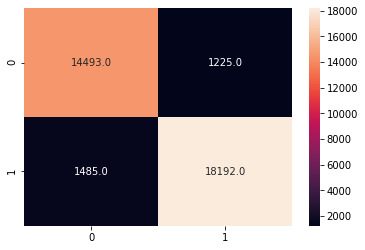

In [59]:
dt = DecisionTreeClassifier(criterion='gini',min_samples_split= 6, min_samples_leaf= 5, max_depth=  18,splitter = 'best', max_features= 'log2')
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [60]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(dt, X, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 92.298


## K nearest neighbour 

Accuracy : 0.9475819146102245
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     36577
           1       0.97      0.94      0.95     46009

    accuracy                           0.95     82586
   macro avg       0.95      0.95      0.95     82586
weighted avg       0.95      0.95      0.95     82586


Accuracy : 0.9249329001271366
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     15718
           1       0.95      0.91      0.93     19677

    accuracy                           0.92     35395
   macro avg       0.92      0.93      0.92     35395
weighted avg       0.93      0.92      0.93     35395



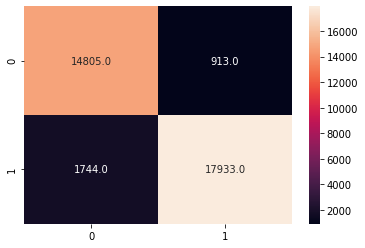

In [61]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [62]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 92.661


##  Random forest classifier

Accuracy : 0.9999878914101664
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36577
           1       1.00      1.00      1.00     46009

    accuracy                           1.00     82586
   macro avg       1.00      1.00      1.00     82586
weighted avg       1.00      1.00      1.00     82586


Accuracy : 0.954795875123605
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15718
           1       0.97      0.95      0.96     19677

    accuracy                           0.95     35395
   macro avg       0.95      0.96      0.95     35395
weighted avg       0.96      0.95      0.95     35395



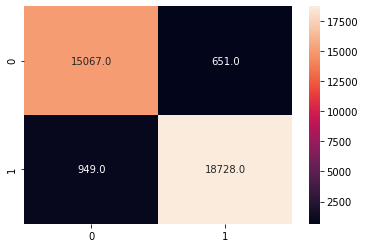

In [63]:
rf = RandomForestClassifier(n_jobs =-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [64]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(rf, X, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 95.716


##  Random forest classifier with hyper paramter tunning

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]


min_samples_split=[3,4,5,6,7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
              
               'max_depth': max_depth,
               
               'min_samples_split': min_samples_split}

print(random_grid)



classifier=RandomForestClassifier()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid,scoring='accuracy', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf.fit(X_train,y_train)



{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [3, 4, 5, 6, 7]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 19.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_split': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='accuracy', verbose=2)

In [66]:
rf.best_params_

{'n_estimators': 1100, 'min_samples_split': 5, 'max_depth': 30}

Accuracy : 0.9958467536870657
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     36577
           1       1.00      0.99      1.00     46009

    accuracy                           1.00     82586
   macro avg       1.00      1.00      1.00     82586
weighted avg       1.00      1.00      1.00     82586


Accuracy : 0.9563497669162311
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     15718
           1       0.97      0.96      0.96     19677

    accuracy                           0.96     35395
   macro avg       0.96      0.96      0.96     35395
weighted avg       0.96      0.96      0.96     35395



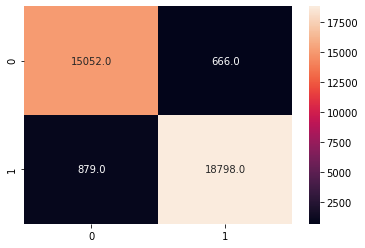

In [67]:
rf = RandomForestClassifier(n_estimators=1100,min_samples_split=5,max_depth=30)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [68]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(rf, X, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 95.733


##  XGBoost classifier

Accuracy : 0.9729251931320079
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     36577
           1       0.98      0.97      0.98     46009

    accuracy                           0.97     82586
   macro avg       0.97      0.97      0.97     82586
weighted avg       0.97      0.97      0.97     82586


Accuracy : 0.9580731741771437
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     15718
           1       0.97      0.96      0.96     19677

    accuracy                           0.96     35395
   macro avg       0.96      0.96      0.96     35395
weighted avg       0.96      0.96      0.96     35395



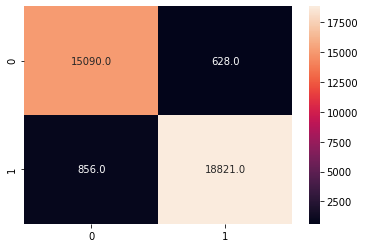

In [69]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()

In [70]:
#cross validation
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=10,random_state = 31)
scores_accuracy = cross_val_score(xgb, X, y, cv=cv, scoring='accuracy',n_jobs=-1)
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 95.803


##  XGBoost classifier with hyperparamter tunning

In [71]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6','0.01']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
subsample=[0.7,0.6,0.8]
min_child_weight=[3,4,5,6,7]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)



regressor=XGBClassifier()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='accuracy', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

xg_random.fit(X_train,y_train)
xg_random.best_params_

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6', '0.01'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 46.6min finished


{'subsample': 0.6,
 'n_estimators': 1200,
 'min_child_weight': 4,
 'max_depth': 25,
 'learning_rate': '0.01'}

Accuracy : 0.9952413241953842
******Classification Report on Traning Data*******
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     36577
           1       1.00      0.99      1.00     46009

    accuracy                           1.00     82586
   macro avg       0.99      1.00      1.00     82586
weighted avg       1.00      1.00      1.00     82586


Accuracy : 0.9595140556575787
******Classification Report on Test Data*******
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     15718
           1       0.97      0.96      0.96     19677

    accuracy                           0.96     35395
   macro avg       0.96      0.96      0.96     35395
weighted avg       0.96      0.96      0.96     35395



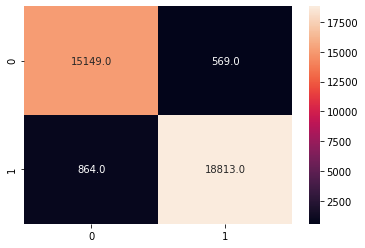

In [44]:
xgb = XGBClassifier(n_estimators = 1200, subsample = 0.6,min_child_weight = 4,max_depth = 25,learning_rate = 0.01)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print('Accuracy :',accuracy_score(y_train, y_train_pred))
print('******Classification Report on Traning Data*******')
print(classification_report(y_train, y_train_pred))
print()
print('Accuracy :',accuracy_score(y_test, y_test_pred))
print('******Classification Report on Test Data*******')
print(classification_report(y_test, y_test_pred))
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True,fmt='.1f')
plt.show()